In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/ASUS/Downloads/TUGASKU/Dicoding/Lintasarta/Project1-MembuatModelNLPdenganTensorFlow/Corona_NLP.csv")
df.head()
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [3]:
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# text processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
import re

# utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
df.Sentiment.unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [5]:
df.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [6]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


<Axes: xlabel='count', ylabel='Sentiment'>

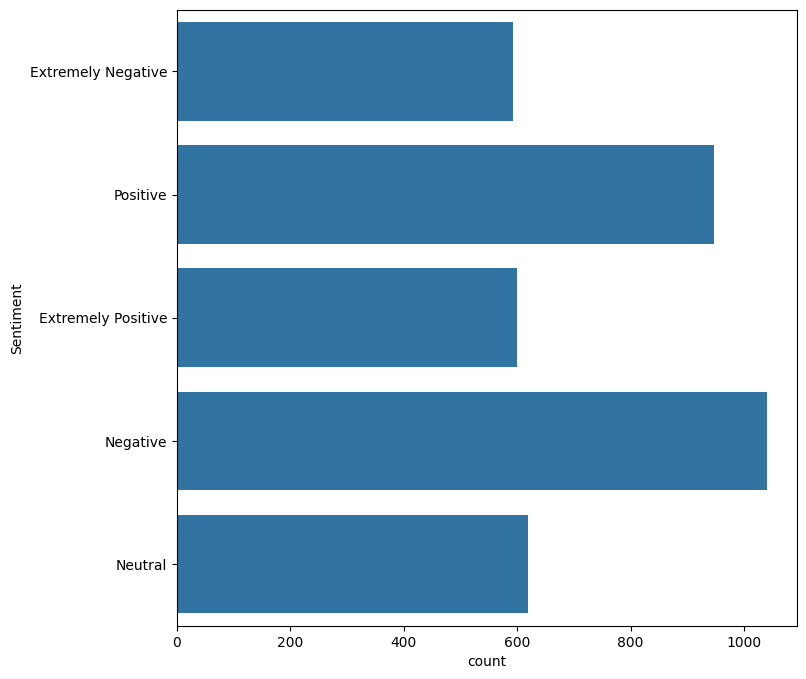

In [7]:
plt.figure(figsize = (8, 8))
sns.countplot(df['Sentiment'])

In [8]:
category = pd.get_dummies(df.Sentiment)
df_new = pd.concat([df, category], axis = 1)
df_new = df_new.drop(columns = 'Sentiment')

df_new

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,True,False,False,False,False
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,False,False,False,False,True
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,False,True,False,False,False
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,False,False,True,False,False
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,False,False,False,False,True
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,False,False,True,False,False
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,False,False,False,True,False
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,True,False,False,False,False


In [9]:
df_new = df_new.replace({True: 1, False: 0})

df_new

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,1,0,0,0,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,0,0,0,0,1
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,0,1,0,0,0
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0,0,1,0,0
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,0,0,0,0,1
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,0,0,1,0,0
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,0,0,0,1,0
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,1,0,0,0,0


In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize( text.lower() )
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)


def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

def clean_text(text):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    # Remove words starting with \
    text1 = re.sub(r'\\\w*', '', text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr])

    return text2.lower()

def stemSentence(text):
    porter = PorterStemmer()
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [12]:
df_new['new_OT'] = df_new['OriginalTweet'].apply(clean_text)
df_new['new_OT'] = df_new['new_OT'].apply(remove_Stopwords)
df_new['new_OT'] = df_new['new_OT'].apply(lemmatize_text)
df_new

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive,new_OT
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,1,0,0,0,0,trending new yorkers encounter empty supermark...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,0,0,0,0,1,couldnt find hand sanitizer fred meyer turned ...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,0,1,0,0,0,find protect loved one coronavirus
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0,0,1,0,0,panic buying hit newyork city anxious shopper ...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0,0,0,1,0,toiletpaper dunnypaper coronavirus coronavirus...
...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,0,0,0,0,1,meanwhile supermarket israel people dance sing...
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,0,0,1,0,0,panic buy lot nonperishable item echo need foo...
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,0,0,0,1,0,asst prof economics cconces nbcphiladelphia ta...
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,1,0,0,0,0,gov need somethings instead biar je rakyat ass...


In [13]:
df_new['stem_OT'] = df_new['new_OT'].apply(stemSentence)

In [14]:
df_new

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive,new_OT,stem_OT
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,1,0,0,0,0,trending new yorkers encounter empty supermark...,trend new yorker encount empti supermarket she...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,0,0,0,0,1,couldnt find hand sanitizer fred meyer turned ...,couldnt find hand sanit fred meyer turn amazon...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,0,1,0,0,0,find protect loved one coronavirus,find protect love one coronaviru
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0,0,1,0,0,panic buying hit newyork city anxious shopper ...,panic buy hit newyork citi anxiou shopper stoc...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0,0,0,1,0,toiletpaper dunnypaper coronavirus coronavirus...,toiletpap dunnypap coronaviru coronavirusaustr...
...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,0,0,0,0,1,meanwhile supermarket israel people dance sing...,meanwhil supermarket israel peopl danc sing to...
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,0,0,1,0,0,panic buy lot nonperishable item echo need foo...,panic buy lot nonperish item echo need food do...
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,0,0,0,1,0,asst prof economics cconces nbcphiladelphia ta...,asst prof econom cconc nbcphiladelphia talk re...
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,1,0,0,0,0,gov need somethings instead biar je rakyat ass...,gov need someth instead biar je rakyat assum l...


In [15]:
df_new.OriginalTweet[0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [16]:
df_new.new_OT[0]

'trending new yorkers encounter empty supermarket shelf pictured wegmans brooklyn soldout online grocer foodkick maxdelivery coronavirusfearing shopper stock httpstcogr76pcrlwh httpstcoivmkmsqdt1'

In [17]:
df_new.stem_OT[0]

'trend new yorker encount empti supermarket shelf pictur wegman brooklyn soldout onlin grocer foodkick maxdeliveri coronavirusfear shopper stock httpstcogr76pcrlwh httpstcoivmkmsqdt1 '

In [18]:
length = df_new['stem_OT'].str.len().max()
length, df_new.columns

(268,
 Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
        'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral',
        'Positive', 'new_OT', 'stem_OT'],
       dtype='object'))

In [19]:
news = df_new['stem_OT'].values
label = df_new[['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral','Positive']].values
label, news

(array([[1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]], dtype=int64),
 array(['trend new yorker encount empti supermarket shelf pictur wegman brooklyn soldout onlin grocer foodkick maxdeliveri coronavirusfear shopper stock httpstcogr76pcrlwh httpstcoivmkmsqdt1 ',
        'couldnt find hand sanit fred meyer turn amazon 11497 2 pack purellcheck coronaviru concern drive price httpstcoygbipbflmi ',
        'find protect love one coronaviru ', ...,
        'asst prof econom cconc nbcphiladelphia talk recent research coronaviru impact economi watch start 33 httpstco8tfynoro5l ',
        'gov need someth instead biar je rakyat assum lockdown ke even worst harini semua supermarket crowd like hell lagi mudah viru tu tersebar covid2019 ',
        'forestandpap member commit safeti employe endus monitor covid19 rest assur tissu manufactur continu produc ship product httpstcoqf6hclcaeq https

In [20]:
# news_Coronatrain, news_Coronatest, label_Coronatrain, label_Coronatest = train_test_split(news, label, test_size = 0.2, random_state = 123)
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size = 0.2, random_state = 123)

In [21]:
# tokenizer = Tokenizer(num_words = 10000, oov_token = '<OOV>')
# tokenizer.fit_on_texts(news_Coronatrain)
# tokenizer.fit_on_texts(news_Coronatest)

# sequences_train = tokenizer.texts_to_sequences(news_Coronatrain)
# sequences_test = tokenizer.texts_to_sequences(news_Coronatest)

In [22]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(news_train)
tokenizer.fit_on_texts(news_test)

sequences_train = tokenizer.texts_to_sequences(news_train)
sequences_test = tokenizer.texts_to_sequences(news_test)

In [23]:
# Contoh data teks
texts = ['Ini adalah contoh teks.', 'Teks yang lain juga ada di sini.']

# Membuat Tokenizer
tokenizer = Tokenizer(num_words=10)

# Menghitung frekuensi kata
tokenizer.fit_on_texts(texts)


In [24]:
# Membuat indeks kata
word_index = tokenizer.word_index
print("Indeks Kata:", word_index)

Indeks Kata: {'teks': 1, 'ini': 2, 'adalah': 3, 'contoh': 4, 'yang': 5, 'lain': 6, 'juga': 7, 'ada': 8, 'di': 9, 'sini': 10}


In [25]:
# Mengonversi teks ke urutan bilangan bulat
sequences = tokenizer.texts_to_sequences(texts)
print("Urutan Bilangan Bulat:", sequences)

Urutan Bilangan Bulat: [[2, 3, 4, 1], [1, 5, 6, 7, 8, 9]]


In [26]:
# Mengonversi teks ke urutan bilangan bulat dengan token OOV
tokenizer.fit_on_texts(texts)
sequences_with_oov = tokenizer.texts_to_sequences(['Teks baru yang tidak dikenal.'])
print("Urutan Bilangan Bulat dengan OOV Token:", sequences_with_oov)

Urutan Bilangan Bulat dengan OOV Token: [[1, 5]]


In [27]:
# maxlen = max(len(sequence) for sequence in sequences_train)
maxlen = int(sum(len(sequence) for sequence in sequences_train) / len(sequences_train))
# maxlen = int(np.percentile([len(sequence) for sequence in sequences_train], 90))
maxlen

20

In [28]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Tentukan panjang maksimum sequences
# maxlen = int(sum(len(sequence) for sequence in sequences_train) / len(sequences_train))
# maxlen

In [29]:
# # Lakukan padding sequences
# padded_train = pad_sequences(sequences_train, maxlen=maxlen, padding='post', truncating='post')
# padded_test = pad_sequences(sequences_test, maxlen=maxlen, padding='post', truncating='post')

In [30]:
padded_train = pad_sequences(sequences=sequences_train,
                             maxlen = maxlen,
                             padding = 'post',
                             truncating = 'post')
padded_test = pad_sequences(sequences=sequences_test,
                            maxlen = maxlen,
                            padding = 'post',
                            truncating = 'post')

padded_train

array([[  51,   21,  149, ...,    0,    0,    0],
       [ 309, 4088,   74, ...,  124,  728, 1019],
       [4090,  395,  271, ...,  415,   88, 1716],
       ...,
       [ 362,  321,  602, ...,    2,    3, 2514],
       [  10,   62, 1290, ...,    0,    0,    0],
       [  52,  549,  182, ...,   13,    9,   89]])

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=256, input_length=maxlen),
    tf.keras.layers.LSTM(512),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [32]:
#compile

model.compile(loss ='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [33]:
#cek model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 256)           2560000   
                                                                 
 lstm (LSTM)                 (None, 512)               1574912   
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 254)               130302    
                                                                 
 dense_2 (Dense)             (None, 128)               32640     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 4561155 (17.40 MB)
Trainable params: 45611

In [43]:
#Callback Function
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.98 and logs.get('val_accuracy') >= 0.98):
            print("\nAccuracy and Val_Accuracy has reached 98%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #setelah 2 epoch, jika tidak ada kenaikan maka LR berkurang
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 4,
    verbose = 1,
    mode = 'auto'
)

#latih model
history = model.fit(padded_train, label_train,
                    epochs = 100,
                    batch_size=128,
                    steps_per_epoch = 30,
                    validation_data = (padded_test, label_test),
                    verbose = 1,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    )

Epoch 1/100
30/30 [==============================] - 10s 273ms/step - loss: 0.0229 - accuracy: 0.9979 - val_loss: 2.9991 - val_accuracy: 0.3921 - lr: 4.0000e-05
Epoch 2/100
30/30 [==============================] - 8s 266ms/step - loss: 0.0151 - accuracy: 0.9982 - val_loss: 3.1241 - val_accuracy: 0.3842 - lr: 4.0000e-05
Epoch 3/100
30/30 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9992
Epoch 3: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
30/30 [==============================] - 8s 284ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 3.2337 - val_accuracy: 0.3921 - lr: 4.0000e-05
Epoch 4/100
30/30 [==============================] - 8s 275ms/step - loss: 0.0097 - accuracy: 0.9984 - val_loss: 3.2624 - val_accuracy: 0.3882 - lr: 8.0000e-06
Epoch 5/100
30/30 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9992
Epoch 5: ReduceLROnPlateau reducing learning rate to 3e-06.
30/30 [==============================] - 9s 2

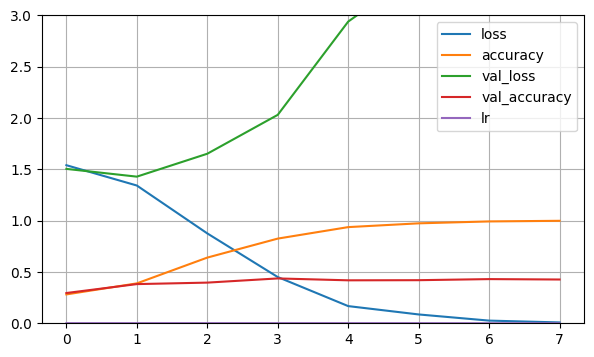

In [35]:
  #plotting

pd.DataFrame(history.history).plot(figsize=(7, 4))
plt.grid(True)
plt.gca().set_ylim(0,3) #sumbu y

plt.show()

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(padded_train, label_train)

Counter(np.argmax(y_res, axis = 1))

Counter({4: 852, 2: 852, 3: 852, 0: 852, 1: 852})

In [37]:
#compile

model.compile(loss ='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [38]:
new_history = model.fit(X_res, y_res,
                         batch_size = 128,
                    steps_per_epoch = 30,
                    epochs = 100,
                    validation_data = (padded_test, label_test),
                    verbose = 1,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    )

Epoch 1/100
30/30 [==============================] - 12s 310ms/step - loss: 0.8857 - accuracy: 0.7315 - val_loss: 1.7055 - val_accuracy: 0.3974 - lr: 0.0010
Epoch 2/100
30/30 [==============================] - 9s 290ms/step - loss: 0.5327 - accuracy: 0.8119 - val_loss: 1.9569 - val_accuracy: 0.3908 - lr: 0.0010
Epoch 3/100
30/30 [==============================] - ETA: 0s - loss: 0.4332 - accuracy: 0.8485
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 [==============================] - 9s 289ms/step - loss: 0.4332 - accuracy: 0.8485 - val_loss: 2.2653 - val_accuracy: 0.3829 - lr: 0.0010
Epoch 4/100
30/30 [==============================] - 9s 298ms/step - loss: 0.3157 - accuracy: 0.8869 - val_loss: 2.5870 - val_accuracy: 0.3842 - lr: 2.0000e-04
Epoch 5/100
30/30 [==============================] - ETA: 0s - loss: 0.2425 - accuracy: 0.9055
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
30/30 [==============================] 

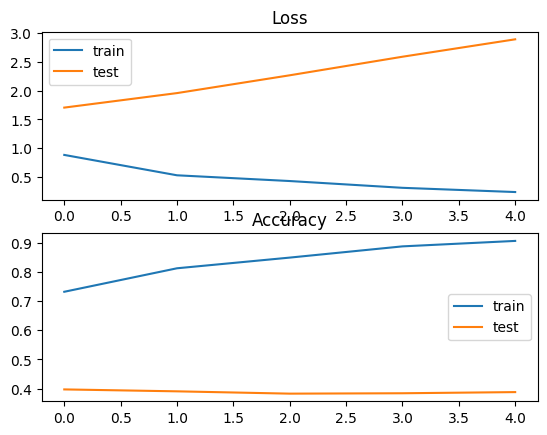

In [39]:
# plot loss
plt.subplot(211)
plt.title('Loss')
plt.plot(new_history.history['loss'], label='train')
plt.plot(new_history.history['val_loss'], label='test')
plt.legend()

# plot accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(new_history.history['accuracy'], label='train')
plt.plot(new_history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


In [40]:
# sanity check
sentence = ["'trend new yorker encount empti supermarket shelf pictur wegman brooklyn soldout onlin grocer foodkick maxdeliveri coronavirusfear shopper stock httpstcogr76pcrlwh httpstcoivmkmsqdt1'"]
sequence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequence, maxlen=maxlen, padding='post', truncating='post')
pred = model.predict(padded)
pred

1/1 [==============================] - 0s 466ms/step


array([[4.1963576e-06, 2.0296648e-05, 5.6771352e-08, 9.9996626e-01,
        9.2694854e-06]], dtype=float32)

In [41]:
# Get the index of the class with the highest predicted probability
predicted_class = np.argmax(pred)

# Print the predicted class
print(f"The model predicts that the sentence is in class {predicted_class}")

The model predicts that the sentence is in class 3


In [42]:
# sanity check actual vs prediction
y_pred = model.predict(padded_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(label_test, axis = 1)

class_names = ['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral','Positive']
actual = [class_names[i] for i in y_test]
prediction = [class_names[i] for i in y_pred]

# # data frame actual vs prediction include text
df_pred = pd.DataFrame({'actual': actual, 'prediction': prediction, 'text': news_test})
df_pred

24/24 [==============================] - 1s 31ms/step


,actual,prediction,text
0,Extremely Negative,Extremely Positive,sinc govt far behind provid appropri medic fac...
1,Negative,Extremely Positive,museum cinema theatr close restaur bar open li...
2,Extremely Positive,Extremely Positive,work support neighbor need best abil pandem ne...
3,Positive,Positive,athen stock exchang open nosed equiti price si...
4,Neutral,Neutral,seem got memo late neighborhood groceri store ...
...,...,...,...
755,Extremely Negative,Negative,genuin concern around covid2019 folk may isol ...
756,Neutral,Negative,went supermarket morn regular weekli shop offi...
757,Positive,Extremely Positive,realiti check covid19 made custom servic worke...
758,Extremely Negative,Negative,went groceri store today pick thing ask hell e...
